In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
datasets = pd.read_csv(r'C:\Users\Devika\Desktop\ML\Machine+Learning+A-Z+(Codes+and+Datasets)\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 6 - Polynomial Regression\Python\Position_Salaries.csv')
x=datasets.iloc[:, 1:-1].values
y=datasets.iloc[:, -1].values

In [20]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [21]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [22]:
y = y.reshape(len(y),1)

In [23]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [24]:
from sklearn.preprocessing import StandardScaler
stdx = StandardScaler()
stdy = StandardScaler()
x= stdx.fit_transform(x)
y = stdy.fit_transform(y)

In [25]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [26]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [27]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)


C:\Users\Devika\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [28]:
stdy.inverse_transform(regressor.predict(stdx.transform([[6.5]])))

array([170370.0204065])

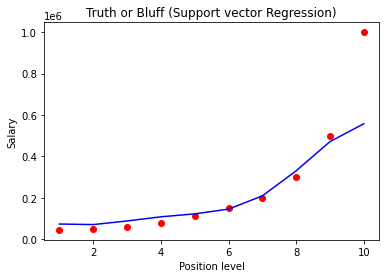

In [29]:
plt.scatter(stdx.inverse_transform(x), stdy.inverse_transform(y), color = 'red')
plt.plot(stdx.inverse_transform(x), stdy.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff (Support vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

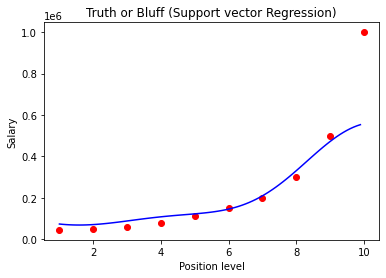

In [30]:
X_grid = np.arange(min(stdx.inverse_transform(x)), max(stdx.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(stdx.inverse_transform(x), stdy.inverse_transform(y), color = 'red')
plt.plot(X_grid, stdy.inverse_transform(regressor.predict(stdx.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [31]:
y_test =  stdy.inverse_transform(y)

In [32]:
y_pred = stdy.inverse_transform(regressor.predict(x))

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.7516001070620798